**Regression is a statistical method that tries to determine the strength and character of the relationship between one dependent variable and a series of other.** 


**While Correlation exaplains the degree of relationship that exists between two variables**

# Simple Linear Regression

<img src="images\\Simple_Linear_Regression_Def.png" alt="image" width="700px">

<h3>The relationship is represented as a straight line equartion  y = ß0 + ß1*X + residue  and the formulas to calculate ß0 anf ß1  are</h3>

<img src="images\\Simple_Linear_Regression_Formula.png" alt="image" width="500px">

<img src="images\\Simple_Linear_Regression_R2.png" alt="image" width="500px">
<img src="images\\Simple_Linear_Regression_Measures.png" alt="image" width="500px">

# Example

<img src="images\\Simple_Linear_Regression_Example1.png" alt="image" width="550px">

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (10,5)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [13]:
df = pd.read_csv("Datasets\\NewspaperData.csv")
df.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [14]:
df.shape

(34, 3)

In [15]:
df

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


In [16]:
# As per our problem statement we have to predict the sales on sunday given the daily sales. In this case name of newspaper doesn't matter

# Hence we will remove the newpaper name column

df = df[['daily','sunday']]
df

,daily,sunday
0,391.952,488.506
1,516.981,798.298
2,355.628,235.084
3,238.555,299.451
4,537.780,559.093
5,733.775,1133.249
6,198.832,348.744
7,252.624,417.779
8,206.204,344.522
9,231.177,323.084


<h3>Correlation Analysis</h3>

<Axes: xlabel='daily', ylabel='sunday'>

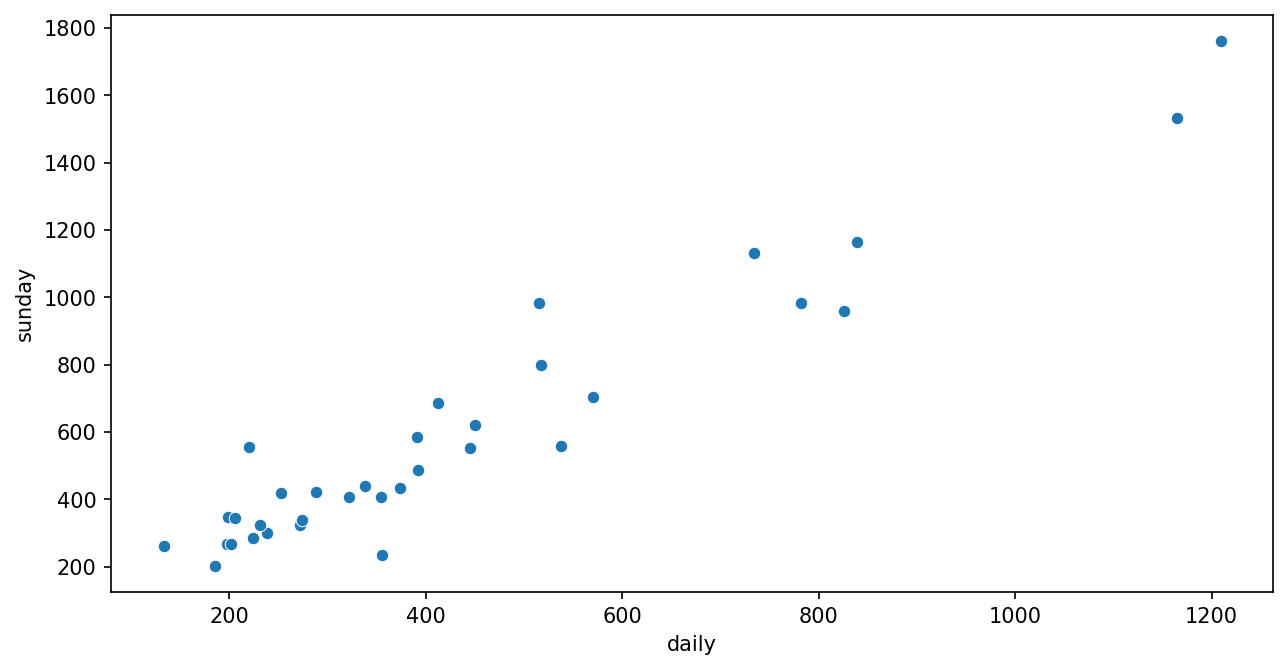

In [18]:
# scatter plot

sns.scatterplot(x="daily", y="sunday", data=df)

In [19]:
# As we can see there is relation between both as one increases other increases as well

In [20]:
# Lets see the degree of relationship among both the columns using correlation matrix

df.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


In [21]:
# Correlation coefficient is 0.96 which is very good

<Axes: >

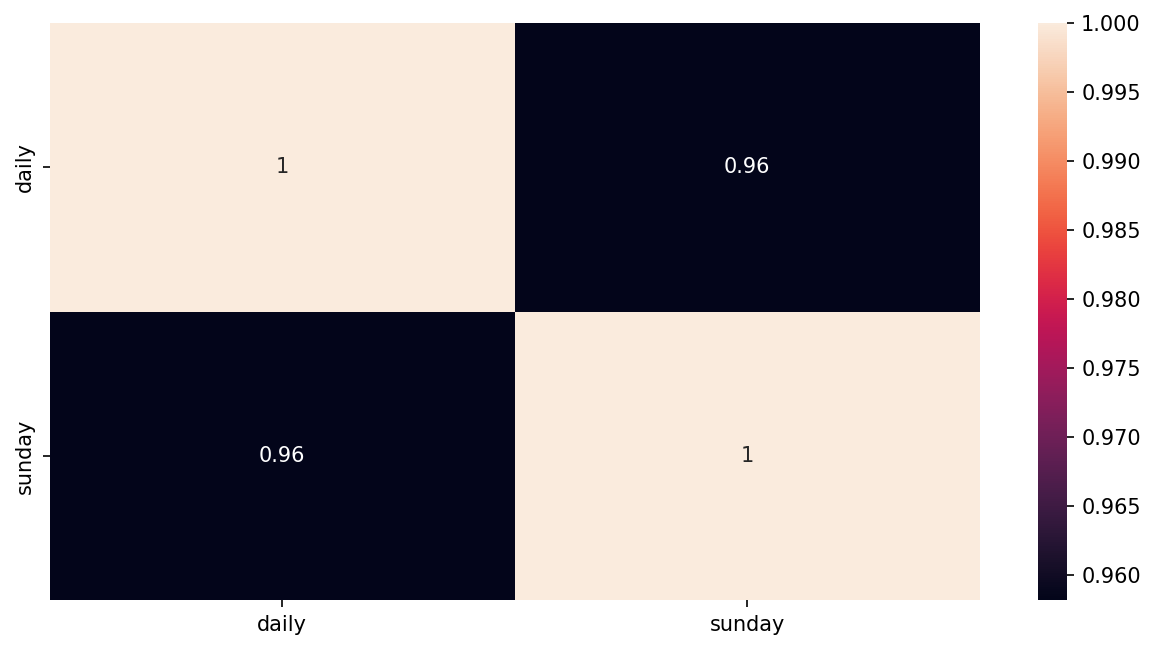

In [22]:
# using heatmap to visualize

sns.heatmap(df.corr(),annot=True)

<h3>Fitting a regression line</h3>

In [24]:
# statsmodels library is used for multiple purposes like statistical calculations, hypothesis testing, linear regression model building, etc

import statsmodels.formula.api as smf      

# Syntax - ols("Dependent_variable~Independent_Variable",data=df)     #.fit() does the calculations and fits the line

model = smf.ols("sunday~daily",data=df).fit()   #Ordinary Least Squares
model

In [25]:
# Regression equation is : Sunday = B0+B1*daily

# TO know values of y-intercent(ß0) and slope(ß1) we can do

model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [26]:
# Hence slope is 1.34 and y-intercent id 13.84. 

# Lets try to predict the sunday sales when the daily sales is 200 using the regression equation we made

sun = 1.34*200 + 13.84
sun

281.84

In [27]:
# we can also check R^2 value

model.rsquared     # In this case its 92% which is too good

0.9180596895873294

<Axes: xlabel='daily', ylabel='sunday'>

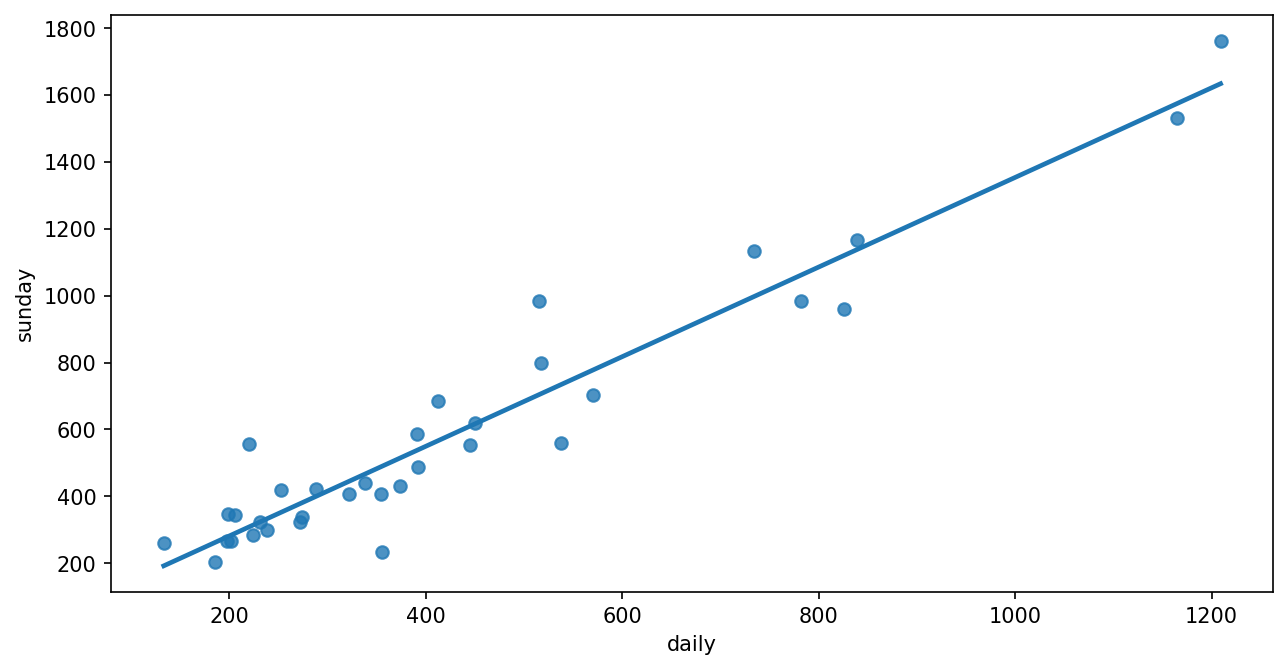

In [28]:
# Lets visualize the regreesion line

sns.regplot(x="daily", y="sunday", data=df,ci=None)

# if ci=None is not written it will show shaded part around the line.
# It is the size of the confidence interval for the regression estimate.

<h3>Predict for new data points</h3>

In [30]:
# To predict for values 200 and 300, for that lets make a pandas series and convert it into dataframe
new_data = pd.Series([200,300])
new_data

0    200
1    300
dtype: int64

In [31]:
to_predict = pd.DataFrame(new_data)
to_predict

,0
0,200
1,300


In [32]:
# to add column names
to_predict = pd.DataFrame(new_data,columns=['daily'])
to_predict

,daily
0,200
1,300


In [33]:
# Now to predict

model.predict(to_predict)

0    281.778581
1    415.750057
dtype: float64

In [34]:
# OR Create a dataframe using dictionary
to_pred2=pd.DataFrame({'daily':[120,250,720,450,640,900]})
to_pred2

,daily
0,120
1,250
2,720
3,450
4,640
5,900


In [35]:
model.predict(to_pred2)

0     174.601401
1     348.764319
2     978.430255
3     616.707271
4     871.253075
5    1219.578912
dtype: float64

# Example 2 - In class exercise 

<img src="images\\Simple_Linear_Regression_Example2.png" alt="image" width="500px">

In [38]:
# Regression equation : AT = ß0 + ß1* waist_circumference

In [39]:
df1 = pd.read_csv("Datasets\\WC_AT.csv")
df1.head()

,Waist,AT,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,74.75,25.72,NaN,NaN,NaN
1,72.60,25.89,NaN,NaN,NaN
2,81.80,42.60,NaN,NaN,NaN
3,83.95,42.80,NaN,NaN,NaN
4,74.65,29.84,NaN,NaN,NaN


In [40]:
df1 = df1[['Waist','AT']]
df1

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
104,100.10,124.00
105,93.30,62.20
106,101.80,133.00
107,107.90,208.00


In [41]:
df1.shape

(109, 2)

<Axes: xlabel='Waist', ylabel='AT'>

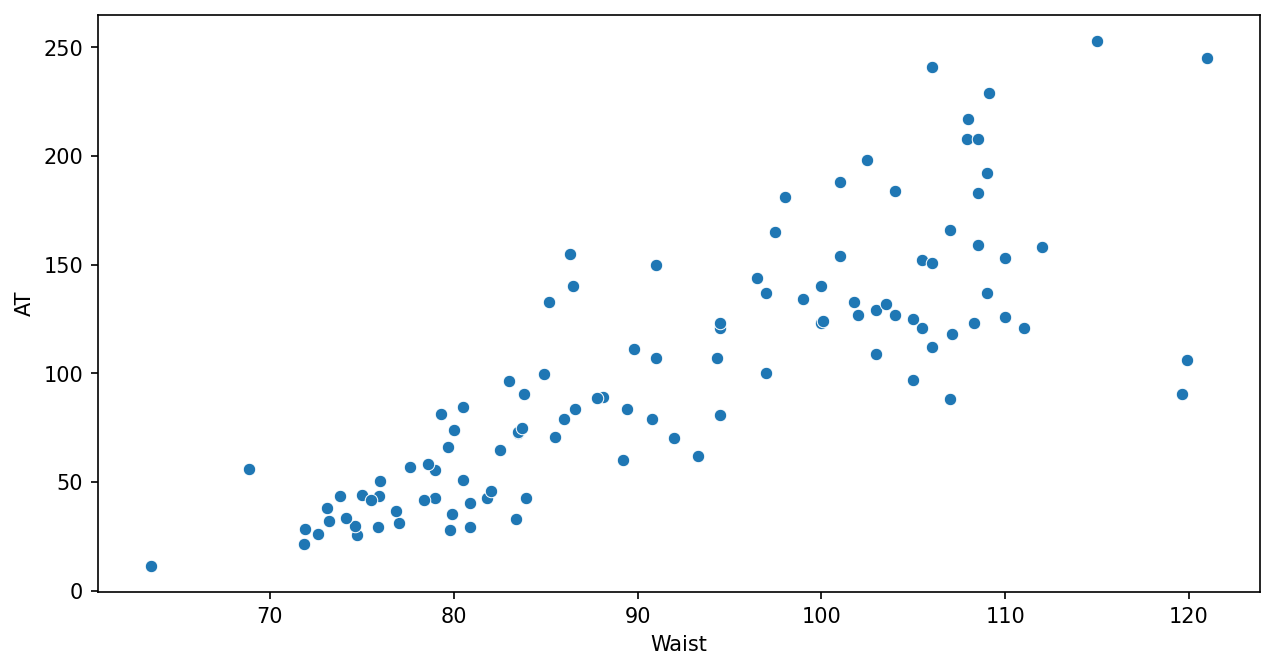

In [42]:
sns.scatterplot(x="Waist",y="AT",data=df1)

In [43]:
# corr matrix
df1.corr()

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


In [44]:
# Fittin regression line

import statsmodels.formula.api as smf    # already imported 

AT_model = smf.ols("AT~Waist",data=df1).fit()
AT_model

In [45]:
AT_model.params

Intercept   -215.981488
Waist          3.458859
dtype: float64

In [46]:
# to predict for Waist 102 using regression equation

AT1 = -215.98 + 3.459*102
AT1

136.838

In [47]:
AT_model.rsquared    # decent model?

0.6700368930528429

<Axes: xlabel='Waist', ylabel='AT'>

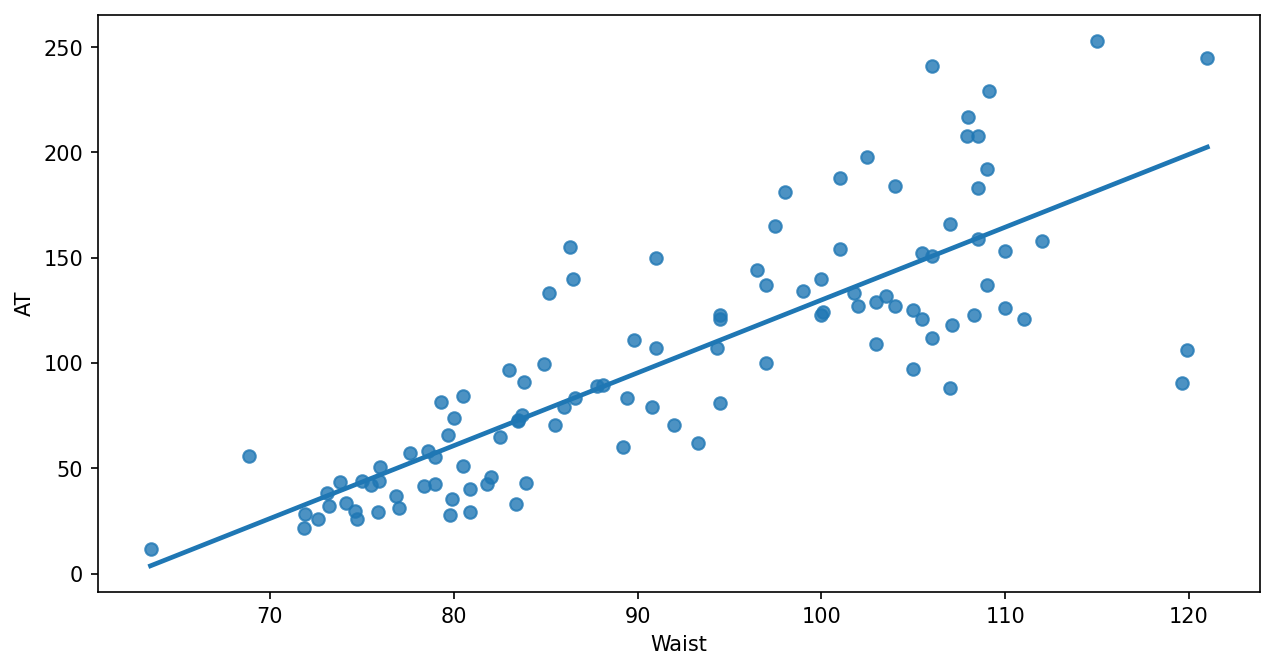

In [48]:
sns.regplot(x="Waist", y="AT",data=df1,ci=None)

In [49]:
# To predict 

to_predict_AT = pd.DataFrame({'Waist':[i for i in range(100,111)]})
to_predict_AT

,Waist
0,100
1,101
2,102
3,103
4,104
5,105
6,106
7,107
8,108
9,109


In [50]:
AT_model.predict(to_predict_AT)

0     129.904451
1     133.363311
2     136.822170
3     140.281029
4     143.739889
5     147.198748
6     150.657608
7     154.116467
8     157.575326
9     161.034186
10    164.493045
dtype: float64